## Assignment 0: Each one of the datasets has properties which makes them hard to learn. Motivate which of the three problems is most difficult for a decision tree algorithm to learn.

![data_rules](data.png)

#### 1. MONK1 a1 = a2 can't be learned easily in the proceed of separating
#### 2. MONK2 There are so many probabilities and randomness 
#### 3. MONK3 5% additional noise

## Assignment 1: The file dtree.py defines a function entropy which calculates the entropy of a dataset. Import this file along with the monks datasets and use it to calculate the entropy of the training datasets.

In [1]:
import dtree as dt
import monkdata as md
import drawtree_qt5 as draw

In [2]:
m1 = md.monk1
m2 = md.monk2
m3 = md.monk3
monk = [m1, m2, m3]
monk_t = [md.monk1test, md.monk2test, md.monk3test]

In [5]:
print(dtree.entropy(md.monk1))
print(dtree.entropy(md.monk1test))
print(dtree.entropy(md.monk2))
print(dtree.entropy(md.monk2test))
print(dtree.entropy(md.monk3))
print(dtree.entropy(md.monk3test))

1.0
1.0
0.957117428264771
0.9135964672699597
0.9998061328047111
0.9977724720899821


## Assignment 2: Explain entropy for a uniform distribution and a non-uniform distribution, present some example distributions with high and low entropy.

#### The uniform distribution always has greater entropy because of the equal propablilities.
#### 1. Bernoulli distribution(high)
#### 2. Poisson distribution(low)

## Assignment 3: Use the function averageGain (defined in dtree.py) to calculate the expected information gain corresponding to each of the six attributes. Note that the attributes are represented as instances of the class Attribute (defined in monkdata.py) which you can access via m.attributes[0], ..., m.attributes[5]. Based on the results, which attribute should be used for splitting the examples at the root node?

In [22]:
for i in range(3):
    print("monk" , i+1 , ":")
    for j in range(6):
        print(dt.averageGain(monk[i], md.attributes[j]))

monk 1 :
0.07527255560831925
0.005838429962909286
0.00470756661729721
0.02631169650768228
0.28703074971578435
0.0007578557158638421
monk 2 :
0.0037561773775118823
0.0024584986660830532
0.0010561477158920196
0.015664247292643818
0.01727717693791797
0.006247622236881467
monk 3 :
0.007120868396071844
0.29373617350838865
0.0008311140445336207
0.002891817288654397
0.25591172461972755
0.007077026074097326


#### 1. a5(0.29)
#### 2. a5(0.17)
#### 3. a2(0.29)

## Assignment 4: For splitting we choose the attribute that maximizes the information gain, Eq.3. Looking at Eq.3 how does the entropy of the subsets, Sk, look like when the information gain is maximized? How can we motivate using the information gain as a heuristic for picking an attribute for splitting? Think about reduction in entropy after the split and what the entropy implies.

#### initial entropy
1. 1.0
2. 0.957
3. 0.999

In [28]:
for i in range(3):
    best = dt.bestAttribute(monk[i], md.attributes)
    print("MONK-" , i + 1 )
    for v in best.values:
        subset = dt.select(monk[i], best, v)
        print("value = ", v ," : " , dt.entropy(subset) , " " ,100 * len(subset) / len(monk[i]),"%")

MONK- 1
value =  1  :  0.0   23.387096774193548 %
value =  2  :  0.9383153522334069   25.0 %
value =  3  :  0.9480782435939054   24.193548387096776 %
value =  4  :  0.9081783472997051   27.419354838709676 %
MONK- 2
value =  1  :  0.9103480624345153   25.443786982248522 %
value =  2  :  1.0   23.668639053254438 %
value =  3  :  0.9633355456726842   28.994082840236686 %
value =  4  :  0.8779620013943912   21.893491124260354 %
MONK- 3
value =  1  :  0.9182958340544896   31.9672131147541 %
value =  2  :  0.8296071030882032   34.42622950819672 %
value =  3  :  0.37764632137370036   33.60655737704918 %


## Assignment 5: Build the full decision trees for all three Monk datasets using buildTree. Then, use the function check to measure the performance of the decision tree on both the training and test datasets. Compute the train and test set errors for the three Monk datasets for the full trees. Were your assumptions about the datasets correct? Explain the results you get for the training and test datasets.

In [8]:
tree = []
for i in range(3):
    tree.append(dt.buildTree(monk[i], md.attributes))
    train_c = dt.check(tree[i], monk[i])
    test_c = dt.check(tree[i], monk_t[i])
    print("train error rate:",round(1-train_c,5))
    print("test error rate:",round(1-test_c,5))

train error rate: 0.0
test error rate: 0.1713
train error rate: 0.0
test error rate: 0.30787
train error rate: 0.0
test error rate: 0.05556


#### Correct. Of course training errors is zero because there's no limitation of depth, and the rules in MONK-2 are too difficult to learn so the test error rate is high.

In [11]:
draw.drawTree(tree[0])

SystemExit: 0

In [12]:
draw.drawTree(tree[1])

SystemExit: 0

In [38]:
draw.drawTree(tree[2])

SystemExit: 0

## Assignment 6: Explain pruning from a bias variance trade-off perspective.

![bias and variance](b-v.png)
![error and complexity](e-c1.png)
![error and complexity](e-c2.png)

## Assignment 7: Evaluate the effect pruning has on the test error for the monk1 and monk3 datasets, in particular determine the optimal partition into training and pruning by optimizing the parameter fraction. Plot the classification error on the test sets as a function of the parameter fraction ∈ {0.3, 0.4, 0.5, 0.6, 0.7, 0.8}.
## Note that the split of the data is random. We therefore need to compute the statistics over several runs of the split to be able to draw any conclusions. Reasonable statistics includes mean and a measure of the spread. Do remember to print axes labels, legends and data points as you will not pass without them.

In [3]:
fractions = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

In [4]:
import random
def partition(data, fraction): 
    ldata = list(data) 
    random.shuffle(ldata) 
    breakPoint = int(len(ldata) * fraction) 
    return ldata[:breakPoint], ldata[breakPoint:]

In [5]:
def pruning(monk, test, itr , fractions):
    pruning_err = [None]*len(fractions)
    for i in range(len(fractions)):
        pruning_err[i] = [None]*itr
    count = 0
    for ft in fractions:
        for i in range(itr):
            data_tr, data_va = partition(monk, ft)
            tree_tr = dt.buildTree(data_tr, md.attributes)
            train_correct = dt.check(tree_tr, data_va)
            best_correct = train_correct
            best_pruning = tree_tr
            trees = dt.allPruned(tree_tr)
            for tree in trees:
                valid_correct = dt.check(tree, data_va)
                if(valid_correct > train_correct):
                    best_correct = valid_correct
                    best_pruning = tree
            new_correct = dt.check(best_pruning, test)
            pruning_err[count][i] = 1 - new_correct
        count += 1
    return pruning_err

In [6]:
def evaluate(err):
    erravgs = []
    errvars = []
    for i in range(len(err)):
        erravg = 0
        for j in range(len(err[i])):
            erravg += (err[i][j]) / len(err[i])
        erravgs.append(round(erravg,5))
    
    for i in range(len(err)):
        errvar = 0
        for j in range(len(err[i])):
            errvar += pow(err[i][j] - erravgs[i],2) / len(err[i])
        errvars.append(round(errvar,5))
    return erravgs , errvars

In [7]:
err1 = pruning(monk[0], monk_t[0], 500 , fractions)

In [8]:
avg1, var1 = evaluate(err1)
print(avg1)
print(var1)

[0.23766, 0.21435, 0.18222, 0.16317, 0.14797, 0.14787]
[0.00198, 0.00226, 0.00256, 0.00236, 0.00239, 0.00189]


In [9]:
err2 = pruning(monk[2], monk_t[2], 500 , fractions)

In [10]:
avg2, var2 = evaluate(err2)
print(avg2)
print(var2)

[0.09329, 0.06988, 0.06302, 0.05694, 0.05152, 0.04719]
[0.00325, 0.0018, 0.00136, 0.00098, 0.00066, 0.00045]


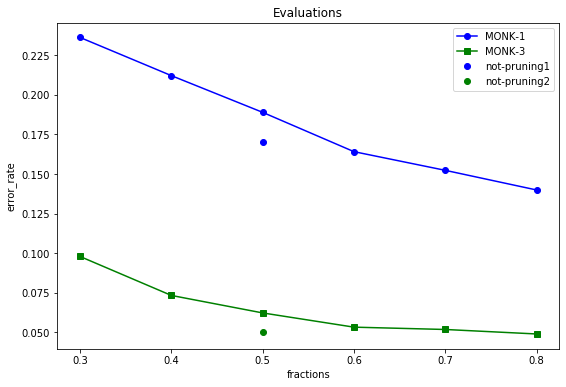

In [41]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(9, 6))
ax1 = fig.add_subplot(111)
ax1.plot(fractions, avg1, c='b', marker="o", label="MONK-1")
ax1.plot(fractions, avg2, c='g', marker="s", label="MONK-3")
plt.plot(0.5,0.17,'bo',label="not-pruning1")
plt.plot(0.5,0.05,'go',label="not-pruning2")
ax1.set_title("Evaluations")
ax1.set_xlabel("fractions")
ax1.set_ylabel("error_rate")
plt.legend(loc='upper right')

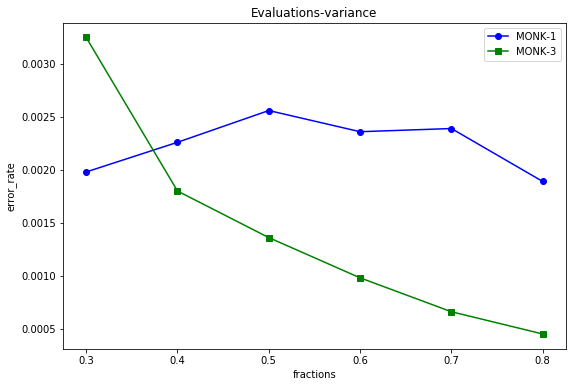

In [15]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(9, 6))
ax1 = fig.add_subplot(111)
ax1.plot(fractions, var1, c='b', marker="o", label="MONK-1")
ax1.plot(fractions, var2, c='g', marker="s", label="MONK-3")
ax1.set_title("Evaluations-variance")
ax1.set_xlabel("fractions")
ax1.set_ylabel("error_rate")
plt.legend(loc='upper right')

In [ ]:
plt.savefig("err_evaluations.png")